In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# transforms.Compose : 이미지에 적용할 여러 변환을 묶는 역할
    # transforms.ToTensor() : 이미지를 텐서로 변환 -> 픽셀 값을 0-255 -> 0-1 사이로 정규화
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) : 각 색상 채널(빨강, 초록, 파랑)의 픽셀 값 범위를 -1 ~ 1 사이로 정규화

transfrom = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

# 데이터셋 다운로드
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transfrom)

# 데이터셋 불러오기
# DataLoader : 데이터셋을 배치 단위로 관리하는 역할
    # batch_size : 배치 크기
    # shuffle : 데이터를 섞을지 여부
    # num_workers : 데이터 로드에 사용할 쓰레드 수
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


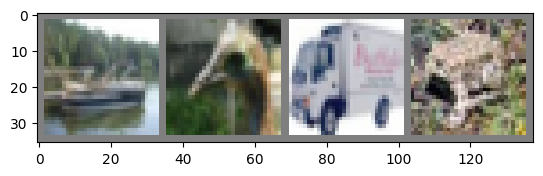

 ship  bird truck  frog


In [ ]:
# 데이터 확인
import matplotlib.pyplot as plt
import numpy as np

# 이미지 시각화 함수
def imshow(img):
    img = img / 2 + 0.5 # 정규화된 이미지를 0-1 사이로 변환
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 하나의 batch 데이터 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)


# torchvision.utils.make_grid : 여러 이미지를 하나의 그림으로 결합
imshow(torchvision.utils.make_grid(images))

# 레이블 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))